In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
raw_data=pd.read_csv('Bank-data.csv')

In [3]:
data=raw_data.copy()
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


### 不必要なデータ、カテゴリー変数の処理

In [4]:
data=data.drop(['Unnamed: 0'],axis=1)
data['y']=data['y'].map({'no':0,'yes':1})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### 記述統計料を整理

In [5]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### 従属変数と独立変数(duration)を定義する

In [6]:
y=data['y']
x1=data['duration']

### 回帰式を作成

In [7]:
x=sm.add_constant(x1)
pre_result=sm.Logit(y,x)
results=pre_result.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.2121
Time:                        18:03:19   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

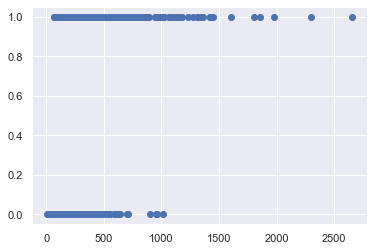

In [8]:
plt.scatter(x1,y)

###　オッズを求める

In [9]:
np.exp(0.0051)

1.005113027136717

### 新たにすべてのカラムを独立変数として追加

In [10]:
estimators=['interest_rate','march','credit','previous','duration']
X1=data[estimators]
y=data['y']

### 再度回帰式を定義

In [11]:
X=sm.add_constant(X1)
pre_logit=sm.Logit(y,X)
result_logit=pre_logit.fit()
result_logit.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.5143
Time:                        18:03:19   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

###　値を予測

In [12]:
result_logit.predict()##怪しい

array([0.10845729, 0.94310101, 0.01016712, 0.8107996 , 0.00950534,
       0.53401102, 0.03208113, 0.00360438, 0.71233264, 0.06744818,
       0.9536981 , 0.49838996, 0.89280993, 0.1015164 , 0.07595256,
       0.81903592, 0.87459125, 0.84855627, 0.3728643 , 0.76321316,
       0.97293194, 0.87334213, 0.12982914, 0.09814958, 0.65435403,
       0.08506009, 0.77401405, 0.76293622, 0.90314904, 0.04231132,
       0.02297297, 0.12217763, 0.27155822, 0.71480891, 0.05771755,
       0.01197368, 0.99318432, 0.06187083, 0.99998254, 0.54171261,
       0.05858667, 0.84153321, 0.05871492, 0.00874369, 0.8683381 ,
       0.54679839, 0.00476303, 0.15173607, 0.15689295, 0.8281327 ,
       0.72220836, 0.05318745, 0.03268499, 0.05137519, 0.00752218,
       0.80512363, 0.09452058, 0.80034267, 0.98080827, 0.83781628,
       0.03688478, 0.1128039 , 0.98917666, 0.76387305, 0.16448677,
       0.30797084, 0.04896691, 0.05903493, 0.99644849, 0.06952408,
       0.02351395, 0.71587342, 0.13853176, 0.97026524, 0.87188

In [13]:
data['y']

0      0
1      1
2      0
3      1
4      0
      ..
513    0
514    1
515    0
516    1
517    0
Name: y, Length: 518, dtype: int64

### pred_tableメゾットで、混合行列を作成、データフレーム化

In [14]:
result_logit.pred_table()##怪しい

array([[218.,  41.],
       [ 30., 229.]])

In [15]:
summary=pd.DataFrame(result_logit.pred_table())

summary

,0,1
0,218.0,41.0
1,30.0,229.0


###　テストデータをインポート

In [16]:
test=pd.read_csv('Bank-data-testing.csv')
test_data=test.copy()
test_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


### カテゴリー変数、いらないカラムを処理

In [17]:
test_data=test_data.drop(['Unnamed: 0'],axis=1)
test_data['y']=test_data['y'].map({'no':0,'yes':1})
test_data

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### 独立変数と従属変数を定義

In [18]:
test_estimators=['interest_rate','march','credit','previous','duration']
test_X1=test_data[test_estimators]
test_y=test_data['y']
test_x=sm.add_constant(test_X1)

### 予測値と正確性を計算し、混合行列を作成

In [19]:
def confusion_matrix(data,actual_values,model):
        
        #ロジットモデルを使った値の予測
        pred_values = model.predict(data)
        # 階級の規定
        bins=np.array([0,0.5,1])
        # ヒストグラムを作成し、値が0と0.5の間の場合は0に、
        # 0.5と1の間の場合は1にします
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # 正確性の計算
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # 混同行列と正確性
        return cm, accuracy

###　テストデータで混合行列を作成

In [20]:
cm = confusion_matrix(test_x,test_y,result_logit)
cm

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

### 訓練データで混合行列を作成

In [21]:
cm = confusion_matrix(X,y,result_logit)
cm

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)